# Principal Component Analysis

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## 1 The dataset given for this problem consists of data extracted from satellite images. The number of features is 36.

In [2]:
df = pd.read_csv('PCA_practice_dataset.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.031250,0.236364,0.238095,-0.090909,0.000000,0.381818,0.326316,-0.015625,-0.125000,0.553398,...,0.576923,0.471264,-0.033333,-0.046154,0.524752,0.410526,-0.015625,-0.187500,0.495146,0.515789
1,-0.031250,0.309091,0.380952,0.074380,0.129032,0.472727,0.557895,0.078125,-0.031250,0.398058,...,0.519231,0.425287,0.000000,0.138462,0.663366,0.368421,0.015625,0.125000,0.533981,0.368421
2,-0.031250,0.381818,0.261905,-0.107438,0.000000,0.527273,0.326316,0.046875,-0.031250,0.631068,...,0.384615,0.103448,-0.250000,-0.138462,0.425743,0.263158,-0.109375,-0.031250,0.650485,0.452632
3,-0.031250,0.381818,0.285714,-0.123967,-0.129032,0.309091,0.073684,-0.156250,0.093750,0.398058,...,0.519231,0.425287,-0.050000,-0.107692,0.485149,0.368421,-0.031250,-0.250000,0.203883,0.094737
4,-0.031250,0.381818,0.357143,-0.024793,-0.096774,0.454545,0.431579,-0.015625,-0.250000,0.398058,...,0.480769,0.471264,-0.033333,-0.169231,0.524752,0.515789,-0.015625,-0.281250,0.495146,0.410526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,0.088958,0.016323,-0.213069,-0.376970,0.117490,0.074181,-0.182175,-0.286841,0.213958,0.240733,...,-0.120300,-0.329808,-0.370927,-0.015385,0.135798,-0.234572,-0.281250,0.093750,0.058469,-0.158971
8038,-0.243556,-0.092159,-0.477827,-0.536054,-0.094557,-0.092159,-0.411973,-0.498926,-0.122852,-0.027792,...,0.077584,-0.261208,-0.527032,-0.012212,0.188800,-0.260264,-0.405176,-0.032324,0.009709,-0.263158
8039,-0.136975,-0.068480,-0.466067,-0.504132,-0.006181,-0.054545,-0.233154,-0.409244,-0.061188,-0.067961,...,-0.168585,-0.566658,-0.532634,-0.279224,-0.223097,-0.539991,-0.534244,-0.181512,-0.053079,-0.416328
8040,-0.163077,-0.090909,-0.476190,-0.517050,-0.096774,-0.090909,-0.359223,-0.437500,-0.250000,-0.029126,...,0.130414,-0.292378,-0.450000,-0.052876,0.029703,-0.288810,-0.406250,-0.031250,0.087379,-0.263158


In [3]:
data = df.to_numpy()
data.shape

(8042, 35)

In [4]:
data = np.matrix(data)

In [5]:
data.shape

(8042, 35)

In [6]:
mean_val = np.mean(data, axis=0)#axis=0 => column wise

In [7]:
mean_val.shape

(1, 35)

In [8]:
d = np.matrix(data.T) # taking transpose to avoid the imaginary values and making the computation easy 

In [9]:
d.shape

(35, 8042)

In [10]:
cov = np.cov(d)

In [11]:
cov.shape

(35, 35)

In [12]:
eig_val, eig_vec = np.linalg.eig(cov)

In [13]:
eig_val ## eigen values will remain same whether we take the transpose or not

array([3.51226699e+00, 1.95974767e+00, 2.46254447e-01, 1.37596099e-01,
       9.40647796e-02, 8.15808436e-02, 5.76794314e-02, 2.41536413e-02,
       1.95698085e-02, 1.53535147e-02, 1.33368429e-02, 8.41289295e-03,
       7.50956515e-03, 7.17790489e-03, 7.01373935e-03, 6.87257345e-03,
       5.07969739e-03, 4.54477434e-03, 4.20149896e-03, 3.63490246e-03,
       3.50321157e-03, 3.24484593e-03, 1.08631748e-03, 2.96356841e-03,
       2.83614520e-03, 2.69172614e-03, 1.30121655e-03, 1.44106622e-03,
       1.50648368e-03, 1.66002817e-03, 1.75646629e-03, 1.86627842e-03,
       1.97418260e-03, 2.25562721e-03, 2.15169295e-03])

In [14]:
eigen_vec_ls = [] # taking the dot product with the data to find the eigen vectors for 8042 elements 
for i in range(eig_vec.shape[1]):
    eig1 = data@eig_vec[:,i]
    eig1 = eig1/eig_val[i]
    eigen_vec_ls.append(np.ravel(eig1))

In [16]:
len(eigen_vec_ls[0])

8042

## 2. Reduce the dimensionality of the dataset using PCA. The threshold limits for the eigenvalues should be varied from 0.9 to 0.97 in steps of 0.01

In [17]:
threshold_list = np.arange(0.90, 0.98, 0.01)

In [18]:
sort_idx = np.argsort(eig_val) ## indices for eigenvalues which are in ascending order
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)

principal_eig_vec = []
principal_eig_val = []

for t in threshold_list:
    temp_sum = 0
    temp_val = []
    temp_vec = []
    i=0
    while(temp_sum<t*eig_val_sum):
        temp_vec.append(eigen_vec_ls[sort_idx[i]])
        temp_val.append(eig_val[sort_idx[i]])
        temp_sum += eig_val[sort_idx[i]]
        i += 1
    print("Number of components is {}".format(i) + " With threshold : {}".format(t))
    principal_eig_vec.append(temp_vec)
    principal_eig_val.append(temp_val)


Number of components is 3 With threshold : 0.9
Number of components is 3 With threshold : 0.91
Number of components is 4 With threshold : 0.92
Number of components is 4 With threshold : 0.93
Number of components is 5 With threshold : 0.9400000000000001
Number of components is 5 With threshold : 0.9500000000000001
Number of components is 6 With threshold : 0.9600000000000001
Number of components is 7 With threshold : 0.9700000000000001


## 3. Obtain the Scree plot for each of these cases. Find the number of principal components retained due to the thresholding.

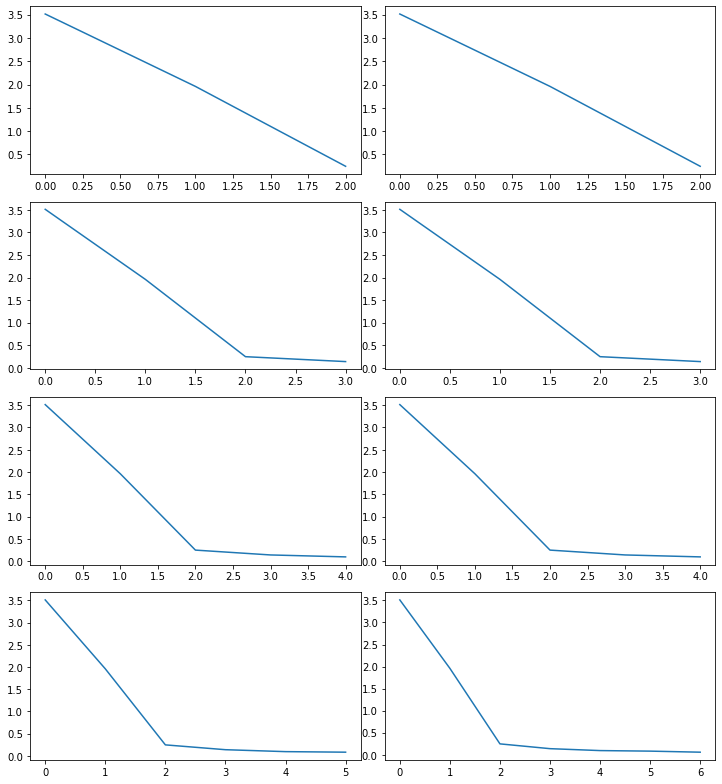

In [19]:
plt.figure(figsize=(10, 11))
for i in range(len(principal_eig_vec)):
    plt.subplot(4, 2, i+1)
    plt.plot(principal_eig_val[i])

plt.tight_layout()